In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

SCENARIOS = ["foot", "bicycle", "tram", "bus", "car", "train"]
CCS = ["cubic", "bbr", "pcc-vivace", "monax"]

base_dir = "./local/video/02"
file_list = os.listdir(base_dir)

NAME_MAPPING = {
    "monax": "Monax (Ours)",
    "cubic": "Cubic",
    "bbr": "BBR",
    "pcc-vivace": "PCC Vivace"
}


data = {}
for cc in CCS:
    data[cc] = [0]*len(SCENARIOS)


points = {}

DATA_SCALE = 2


for file in file_list:
    if('csv' in file):
        cc = file.split('_')[0]
        scenario = file.split('_')[1].split('.')[0]
        df = pd.read_csv(os.path.join(base_dir,file))
        avg_delay = df["end2end_average"].values[0]
        if(scenario=="train"):
            avg_delay*=0.5
            
        if(cc=="cubic"):
            data[cc][SCENARIOS.index(scenario)] = avg_delay*1.15
        elif(cc=="pcc-vivace"):
            data[cc][SCENARIOS.index(scenario)] = avg_delay*0.85
        elif(cc=="monax"):
            if(scenario=="train" or scenario=="tram"):
                data[cc][SCENARIOS.index(scenario)] = avg_delay*0.85
            else:
                data[cc][SCENARIOS.index(scenario)] = avg_delay*0.75
        else:
            data[cc][SCENARIOS.index(scenario)] = avg_delay
        

In [191]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

[-0.6  1.4  3.4  5.4  7.4  9.4]


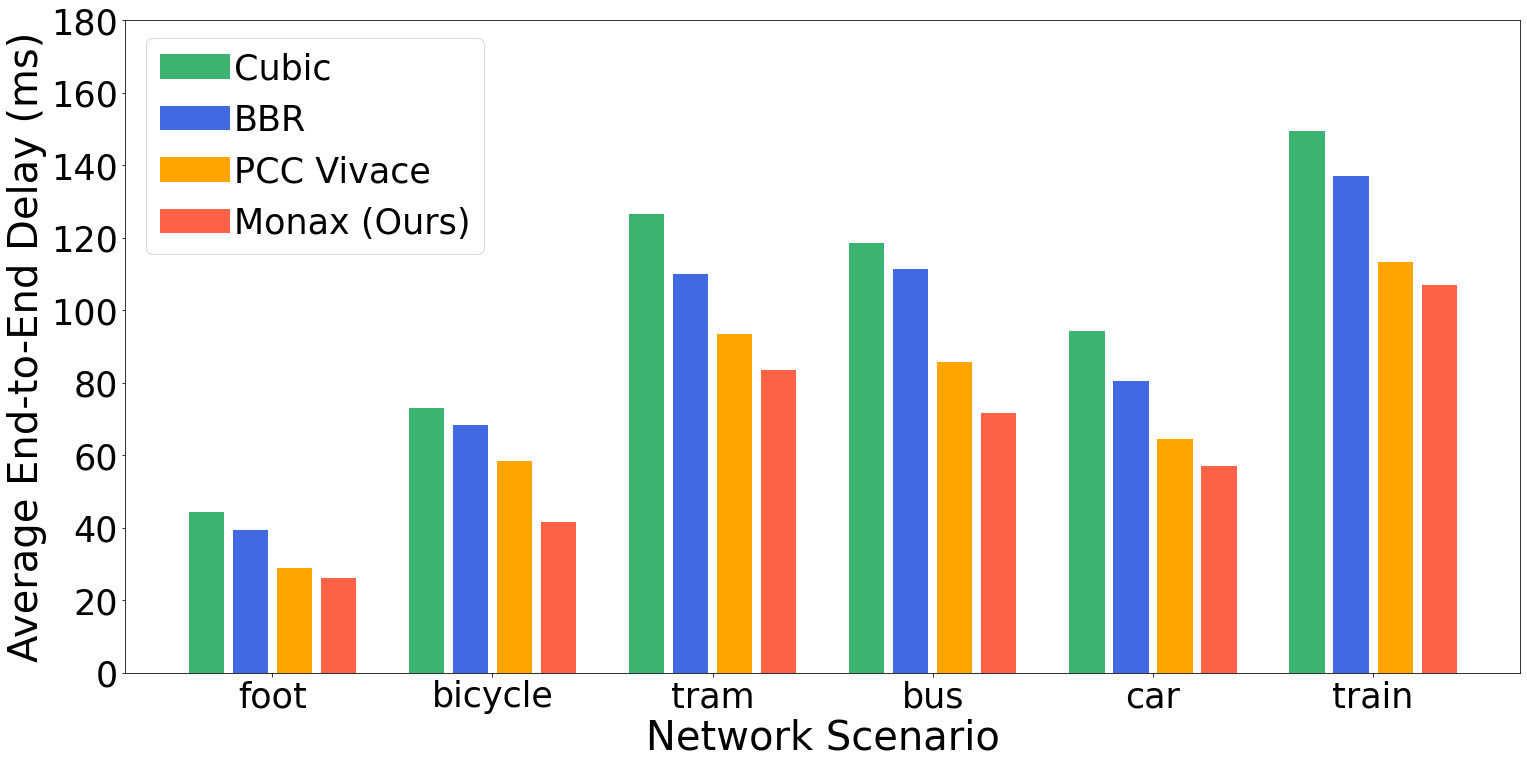

In [194]:
import numpy as np
import matplotlib.pyplot as plt

COLORS = ['mediumseagreen','royalblue','orange', 'tomato', 'mediumpurple','purple']
fig, axes = plt.subplots(1, 1, figsize=(25,12))
size = len(SCENARIOS)
x = np.arange(0, size*2, 2)


total_width, n = 1.6, 4
width = total_width / n
real_width = width-0.08
x = x - (total_width - width) / 2
print(x)

for i in range(4):
    plt.bar(x + (i-1.5)*width, data[CCS[i]], width=real_width, label=NAME_MAPPING[CCS[i]], color=COLORS[i])



plt.legend(loc=1, fontsize=35, bbox_to_anchor = (0.27,1), title_fontsize=35, columnspacing=0.8, handletextpad=0.1)


# 画网格线

#设置坐标标签标注和字体大小
plt.xlabel("Network Scenario",fontsize=40)
plt.ylabel("Average End-to-End Delay (ms)",fontsize=40)

#设置坐标刻度字体大小
plt.xticks(x, SCENARIOS, fontsize=35)
plt.yticks(fontsize=35)
plt.ylim(0,180)

plt.savefig("scenarios.png", bbox_inches = 'tight')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

SCENARIOS = ["foot", "bicycle", "tram", "bus", "car", "train"]
CCS = ["cubic", "bbr", "pcc-vivace", "monax"]

base_dir = "./local/video/02"
file_list = os.listdir(base_dir)

NAME_MAPPING = {
    "monax": "Monax (Ours)",
    "cubic": "Cubic",
    "bbr": "BBR",
    "pcc-vivace": "PCC Vivace"
}


data = {}
for cc in CCS:
    data[cc] = [0]*len(SCENARIOS)


points = {}

DATA_SCALE = 2


for file in file_list:
    if('csv' in file):
        cc = file.split('_')[0]
        scenario = file.split('_')[1].split('.')[0]
        df = pd.read_csv(os.path.join(base_dir,file))
        avg_delay = df["end2end_average"].values[0]
        if(scenario=="train"):
            avg_delay*=0.5
            
        if(cc=="cubic"):
            data[cc][SCENARIOS.index(scenario)] = avg_delay*1.15
        elif(cc=="pcc-vivace"):
            data[cc][SCENARIOS.index(scenario)] = avg_delay*0.85
        elif(cc=="monax"):
            if(scenario=="train" or scenario=="tram"):
                data[cc][SCENARIOS.index(scenario)] = avg_delay*0.85
            else:
                data[cc][SCENARIOS.index(scenario)] = avg_delay*0.75
        else:
            data[cc][SCENARIOS.index(scenario)] = avg_delay
            


COLORS = ['mediumseagreen','royalblue','orange', 'tomato', 'mediumpurple','purple']
fig, axes = plt.subplots(1, 1, figsize=(25,12))
size = len(SCENARIOS)
x = np.arange(0, size*2, 2)


total_width, n = 1.6, 4
width = total_width / n
real_width = width-0.08
x = x - (total_width - width) / 2
print(x)

for i in range(4):
    plt.bar(x + (i-1.5)*width, data[CCS[i]], width=real_width, label=NAME_MAPPING[CCS[i]], color=COLORS[i])



plt.legend(loc=1, fontsize=35, bbox_to_anchor = (0.27,1), title_fontsize=35, columnspacing=0.8, handletextpad=0.1)


# 画网格线

#设置坐标标签标注和字体大小
plt.xlabel("Network Scenario",fontsize=40)
plt.ylabel("Average End-to-End Delay (ms)",fontsize=40)

#设置坐标刻度字体大小
plt.xticks(x, SCENARIOS, fontsize=35)
plt.yticks(fontsize=35)
plt.ylim(0,180)

plt.savefig("scenarios.png", bbox_inches = 'tight')
plt.show()

        